In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import time
from scipy.sparse.csc import csc_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<ipython-input-101-196503533648>:8: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  from scipy.sparse.csc import csc_matrix


In [102]:
comments=pd.read_csv("/content/CyberBullying Comments Dataset.csv")

In [103]:
comments

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0
...,...,...
11095,"""Don't worry you little empty head over it ......",1
11096,"""Some of Ya'll are dumb as fuck.... These are ...",1
11097,"""Lana, you're so full of shit your eyes are br...",1
11098,"""You ain't lying let the @dbeeio61:disqus\xa0\...",1


In [104]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


In [105]:
comments.describe()

,CB_Label
count,11100.000000
mean,0.500000
std,0.500023
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


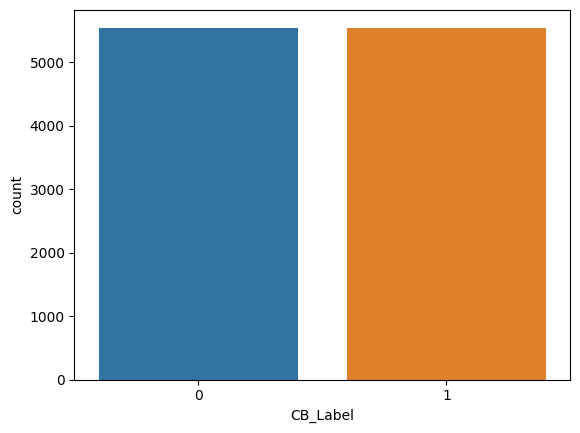

In [106]:
sns.countplot(x="CB_Label",data=comments);

###Removing punctuation marks and digits from text and converting to lowercase

In [107]:
def remove_punctuation(text):
    return text.translate(string.punctuation)

comments['Text_clean'] = comments['Text'].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
comments['Text_clean'] = comments['Text_clean'].apply(lambda x:x.translate(str.maketrans('','',string.digits)))
comments['Text_clean'] = comments['Text_clean'].apply(lambda x: x.lower())

In [108]:
comments.loc[3]

Text          I got one fucking day of sprinkles and now it'...
CB_Label                                                      0
Text_clean    i got one fucking day of sprinkles and now its...
Name: 3, dtype: object

###Processing the data using word count
Count Vectorizer give number of frequency with respect to index of vocabulary

In [109]:
vectorizer = CountVectorizer(analyzer='word')

In [110]:
text_count=vectorizer.fit_transform(comments['Text_clean'])

In [111]:
text_count=text_count.toarray()

In [112]:
words_count = pd.DataFrame(data=text_count,columns = vectorizer.get_feature_names_out())
print(words_count)

       aa  aaaaaaaaaaaaaaasr  aaaaaanndgummy  aaaagh  aaand  aaargh  aaarrrg  \
0       0                  0               0       0      0       0        0   
1       0                  0               0       0      0       0        0   
2       0                  0               0       0      0       0        0   
3       0                  0               0       0      0       0        0   
4       0                  0               0       0      0       0        0   
...    ..                ...             ...     ...    ...     ...      ...   
11095   0                  0               0       0      0       0        0   
11096   0                  0               0       0      0       0        0   
11097   0                  0               0       0      0       0        0   
11098   0                  0               0       0      0       0        0   
11099   0                  0               0       0      0       0        0   

       aac  aah  aakar  ...  zooming  z

In [113]:
sentiment=np.array(comments['CB_Label'])
sentiment

array([0, 0, 0, ..., 1, 1, 1])

###Doing train-test split

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(text_count,sentiment,test_size=0.2,random_state=10)

##Logistic Regression

In [115]:
logistic_model=LogisticRegression(random_state=0)

In [116]:
logistic_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [117]:
prediction=logistic_model.predict(X_test)

In [118]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1143
           1       0.73      0.71      0.72      1077

    accuracy                           0.73      2220
   macro avg       0.73      0.73      0.73      2220
weighted avg       0.73      0.73      0.73      2220



##Majority-class Classifier
A simple majority classifier is one where every point is assigned to whichever class is in the majority in the training set. (If there is no majority, one of the classes is chosen arbitrarily). This classifier is often used as a baseline for comparing other machine learning techniques.

In [119]:
majority_prediction=np.ones(len(Y_test))

In [120]:
print(classification_report(Y_test,majority_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1143
           1       0.49      1.00      0.65      1077

    accuracy                           0.49      2220
   macro avg       0.24      0.50      0.33      2220
weighted avg       0.24      0.49      0.32      2220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
confusion_matrix(Y_test,prediction)

array([[868, 275],
       [315, 762]])

##Logistic Regression Using TFIDF
Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus). Words within a text document are transformed into importance numbers by a text vectorization process.

In [122]:
tfidf=TfidfVectorizer(analyzer='word')

In [123]:
tfidf_words=tfidf.fit_transform(comments["Text_clean"])

In [124]:
tfidf_words=tfidf_words.toarray()

In [125]:
words_df_tfidf = pd.DataFrame(data=tfidf_words,columns = tfidf.get_feature_names_out())
print(words_df_tfidf)

        aa  aaaaaaaaaaaaaaasr  aaaaaanndgummy  aaaagh  aaand  aaargh  aaarrrg  \
0      0.0                0.0             0.0     0.0    0.0     0.0      0.0   
1      0.0                0.0             0.0     0.0    0.0     0.0      0.0   
2      0.0                0.0             0.0     0.0    0.0     0.0      0.0   
3      0.0                0.0             0.0     0.0    0.0     0.0      0.0   
4      0.0                0.0             0.0     0.0    0.0     0.0      0.0   
...    ...                ...             ...     ...    ...     ...      ...   
11095  0.0                0.0             0.0     0.0    0.0     0.0      0.0   
11096  0.0                0.0             0.0     0.0    0.0     0.0      0.0   
11097  0.0                0.0             0.0     0.0    0.0     0.0      0.0   
11098  0.0                0.0             0.0     0.0    0.0     0.0      0.0   
11099  0.0                0.0             0.0     0.0    0.0     0.0      0.0   

       aac  aah  aakar  ...

In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(words_df_tfidf,sentiment,test_size=0.2,random_state=11)

In [127]:
%%time
tfidf_logistic_model=LogisticRegression(random_state=11).fit(X_train,Y_train)

CPU times: user 26 s, sys: 5.44 s, total: 31.4 s
Wall time: 18 s


In [128]:
tfidf_logistic_predictions=tfidf_logistic_model.predict(X_test)

In [129]:
print(classification_report(Y_test,tfidf_logistic_predictions))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75      1116
           1       0.77      0.68      0.72      1104

    accuracy                           0.74      2220
   macro avg       0.74      0.74      0.74      2220
weighted avg       0.74      0.74      0.74      2220



#Conclusion
For preprocessing:
* Tokenization: Splitting the text into words or tokens.
* Removing punctuation and converting text to lowercase.
* Vectorizing the text using TF-IDF (Term Frequency-Inverse Document Frequency) and/or count
#####Then logistic regression was performed and a majority class classifier was trained to determine the baseline
#####The model achieved maximum of 0.74 accuracy, precision, recall, and F1-score on the validation set.

